**Grupo:**

Davi Richards\
Maria Eduarda Ferreira\
Pedro Wong

# Equações diferenciais

Uma equação diferencial, de forma bastante abstrata, é dada por
$$ \begin{cases}
    y'(t)  & = F(t, y(t)) \\
    y(t_0) & = y_0.
\end{cases} $$
Uma solução é **uma função** $y(t)$ satisfazendo tanto a _condição inicial_ $y(t_0) = y_0$
quanto a _dinâmica_ $y'(t) = F(t, y(t))$.

Por questões práticas, também é comum dar um _intervalo de solução_, ou seja,
pedir que $y$ seja definida (pelo menos) num intervalo $[a,b]$ onde $t_0 \in [a,b]$.
Aqui, vamos usar $a = t_0$,
pensando "fisicamente" que a equação diferencial modela
a evolução de alguma quantidade $y$ que conhecemos agora ($t_0$)
e que queremos saber o quanto restará num momento futuro ($t_f = b$).

## Parte 1: O método de Euler

Continuando nesta linha, é razoável discretizar o problema da seguinte forma:

1. Definimos uma sequência de pontos $a = t_0 < t_1 < t_2 < \cdots < t_n = t_f = b$ no intervalo $[a,b]$.
2. Como $f$ é derivável, temos a aproximação $y(t_{i+1}) \sim y(t_i) + (t_{i+1} - t_i)y'(t_i)$.
3. A equação diferencial permide calcular $y'(t_i) = F(t_i, y(t_i))$.
4. Isso define (recursivamente) uma sequência de aproximações $y_i$ para $y(t_i)$ pela fórmula
$$ y_{i+1} = y_i + (t_{i+1} - t_i) F(t_i, y_i).$$

A sequência mais simples de ser usada é, claro, a de $n+1$ pontos igualmente espaçados no intervalo $[a,b]$.

In [166]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Implemente o método de Euler

Escreva a função `euler` que divide o intervalo $[t_0, t_f]$ em `nsteps` intervalos de mesmo comprimento,
e retorna
- as `nsteps+1` extremidades `t_i`,
- as `nsteps+1` aproximações `y_i` de $y$ nestes pontos.

Dica: use `append` para construir os valores de `y_i`, mas retorne um `np.array()` para simplificar as contas.

In [167]:
def euler(F, t0, tf, y0, nsteps=100):
    """Recebe uma função F(t,y) e dois pontos t0 e tf, retornando um array com n+1 
    pontos igualmente espaçados do intervalo [t0,tf] e as aproximações dos y's 
    nos nesses pontos."""
    ts, h = np.linspace(t0, tf, num=nsteps+1, retstep=True)
    ys = [y0]
    for t in ts[:-1]:
      yt = ys[-1]
      ys.append(yt + h * F(t, yt))
    return ts, np.array(ys)

Resolvendo uma EDO simples: $f' = f$.

In [168]:
def F1(t,y):
    return y

t_100, y_100 = euler(F1, 0, 1, 1)
assert len(t_100) == 101
assert t_100[0] == 0
assert t_100[-1] == 1

In [169]:
t_100, y_100 = euler(F1, 0, 1, 1)
assert len(y_100) == 101
assert y_100[0] == 1
assert( abs(y_100[-1] - 2.704813829421526) < 5e-15 )

O que é melhor é que o método de Euler permite resolver equações diferenciais bastante (arbitrariamente!) complicadas:

In [170]:
def F_dificil(t, y):
    return t*np.sin(y) - t**2*np.cos(y)

_, y_dificil = euler(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(y_dificil[-1] - 3.553673725510754) < 5e-15 )

### 2. Qualidade da aproximação

Agora, faça um gráfico da solução numérica com mil pontos $f_{1000}$ para $f' = f$,
e da solução exata $f(t) = e^t$ no intervalo $[0,1]$.
Faça também um gráfico da diferença entre estas soluções.

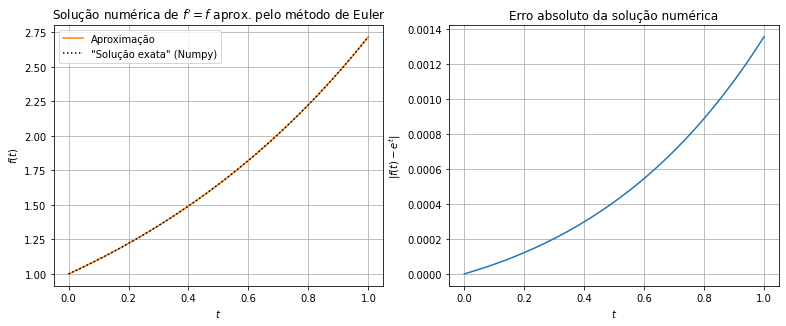

In [171]:
t_1000, f_1000 = euler(F1, 0, 1, 1, nsteps=1000)
f_ex = np.exp(t_1000)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4.8))

axs[0].plot(t_1000, f_1000, label="Aproximação", color="C1")
axs[0].plot(t_1000, f_ex, label='"Solução exata" (Numpy)', linestyle=":", color="k")

axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$f(t)$")

axs[0].legend()
axs[0].set_title("Solução numérica de $f'=f$ aprox. pelo método de Euler")
axs[0].grid()

axs[1].plot(t_1000, np.abs(f_1000 - f_ex))

axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$|f(t) - e^t|$")

axs[1].set_title("Erro absoluto da solução numérica")
axs[1].grid();

Faça o gráfico agora do erro **relativo**.

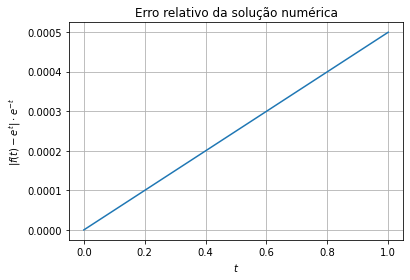

In [172]:
fig, ax = plt.subplots()

ax.plot(t_1000, np.abs(f_1000 - f_ex)/f_ex)

ax.set_xlabel("$t$")
ax.set_ylabel("$|f(t) - e^t| \cdot e^{-t}$")

ax.set_title("Erro relativo da solução numérica")
ax.grid()

ax = plt.gca()
plt.show()

In [173]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

In [174]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 0.0
assert max(xdata) == 1.0

ydata = ax.lines[0].get_ydata()
assert min(ydata) > -0.001
assert max(ydata) <  0.001

In [175]:
ax = None

### 3. Medindo erros

Suponha que conhecemos a solução exata da EDO, que chamaremos aqui de $g(t)$ para evitar confundir com $y_i$.
Mesmo que em muitos casos seja bastante razoável usar o "erro final" $g(t_n) - y_n$,
onde $g$ é a solução exata e $y_n$ a aproximação,
vamos nos concentrar no "erro total".
E, para ficar relativamente simples, vamos usar a **média dos valores absolutos das diferenças** entre $g(t_j)$ e $y_j$.
Usamos a média, e não a soma, porque ao variar o número de passos esta quantidade se mantém homogênea.

In [176]:
def erro(g, ys, ts):
    """ Calcula o erro entre os valores de ys e g(ts).  ys e ts  devem ser vetores numpy, e  g uma função. """
    # return np.sum(np.abs(g(ts) - ys))/len(ys)
    return np.average(np.abs(g(ts) - ys))

Como o erro total diminui ao aumentar o número de passos efetuados?
Faça um gráfico.

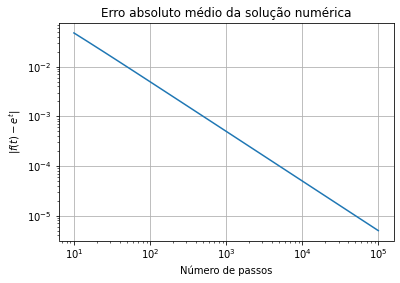

CPU times: user 826 ms, sys: 4.87 ms, total: 831 ms
Wall time: 841 ms


In [177]:
%%time
ns = np.logspace(1,5,num=21, dtype=int)
err = []

for n in ns:
  ts,ys = euler(F1, 0, 1, 1, nsteps = n)
  err.append(erro(np.exp, ys, ts))

fig, ax = plt.subplots()

ax.loglog(ns, err)

ax.set_xlabel("Número de passos")
ax.set_ylabel("$|f(t) - e^t|$")

ax.set_title("Erro absoluto médio da solução numérica")
ax.grid()

ax = plt.gca()
plt.show();

In [178]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 1

ydata = ax.lines[0].get_ydata()
assert 1e-6 < min(ydata) < 1e-4
assert 1e-2 < max(ydata) < 1e-1

E comente o resultado.

O gráfico do erro total $\varepsilon_T$ em função do número de passos $n$ é linear na escala loglog, o que indica um decaimento exponencial do erro com $\log(n)$. Mais precisamente, temos $\log(\varepsilon_T)$ um pouco menor do que $-\log(n)$.

Ademais, a regularidade da curva sugere que pouco ruído foi introduzido devido ao erro numérico. Isso indica que, nas condições dadas para o problema e nessa escala de valores de $n$ (entre $10^1$ e $10^5$), a magnitude do erro numérico foi, provavelmente, bastante menor do que a do erro de aproximação "analítico".

### 4. Sistemas de Equações

Se você usar funções "vetorizadas" para `F`,
o seu método de Euler é capaz de resolver (aproximar) até _sistemas_ de equações diferenciais.

Por exemplo, o sistema
$$ \begin{align}
v_0' & =  v_1 \\
v_1' & = -v_0
\end{align} $$
que é equivalente à equação diferencial trigonométrica básica $y'' = -y$,
pode ser simulado assim:

In [179]:
def F2(t, v):
    return np.array([v[1],-v[0]])

ans = np.array([-1.0505597866729235, -0.0010851561020816455])
ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)

assert( all(abs(vs[-1]/ans - 1) < 1e-15) )

Dependendo de como você tenha implementado `euler()`, os valores de `vs` serão todos iguais,
pois você terá construído uma lista com `nsteps+1` vezes o mesmo `array`.
Para corrigir isso, modifique sua função `euler` para criar uma cópia de cada valor de $f_i$ antes de incluir na lista.

In [180]:
# def euler(F, t0, tf, v0, nsteps=100):
#     pass

*Foi esclarecido pelo prof. Pedro no Discord que, caso não tivéssemos o problema dos valores de `vs` repetidos, poderíamos substituir essa definição por um `pass`. Como isso teria o problema de "sobrescrever" a definição anterior, comentamos a célula.*

Para usar as coordenadas da solução separadamente, ou seja, $f_1$ e $f_2$,
temos que transpor `v`.
(Note que os métodos constróem ao longo do tempo, e não por coordenadas)

In [181]:
ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)
vs = np.transpose(vs)
vs[:,:10]

array([[ 1.        ,  1.        ,  0.99901304,  0.99703912,  0.99407921,
         0.99013527,  0.9852102 ,  0.97930792,  0.97243327,  0.96459208],
       [ 0.        , -0.03141593, -0.06283185, -0.09421677, -0.12553968,
        -0.1567696 , -0.18787562, -0.21882691, -0.24959277, -0.28014267]])

### 5. Mais gráficos

Observe que a sua solução numérica realmente está próxima da solução analítica,
fazendo um gráfico para a função e sua derivada,
tanto numéricas como analíticas.

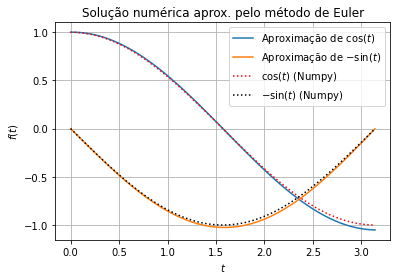

In [182]:
ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)
vs = np.transpose(vs)

fig, ax = plt.subplots()

ax.plot(ts, vs[0], label="Aproximação de $\cos(t)$")
ax.plot(ts, vs[1], label="Aproximação de $-\sin(t)$")
ax.plot(ts, np.cos(ts), label='$\cos(t)$ (Numpy)', linestyle=":", color="r")
ax.plot(ts, -np.sin(ts), label='$-\sin(t)$ (Numpy)', linestyle=":", color="k")

ax.set_xlabel("$t$")
ax.set_ylabel("$f(t)$")

ax.legend()
ax.set_title("Solução numérica aprox. pelo método de Euler")
ax.grid()
ax = plt.gca()
plt.show();

In [183]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 4
assert len(ax.legend().texts) == 4

In [184]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 0.0
assert max(xdata) == np.pi

ydata = [l.get_ydata() for l in ax.lines]
assert -1.1 < np.min(ydata) < -1.0
assert np.max(ydata) == 1.0

In [185]:
ax = None

Agora, aumente o intervalo de integração para $6\pi$, e use 600 passos.

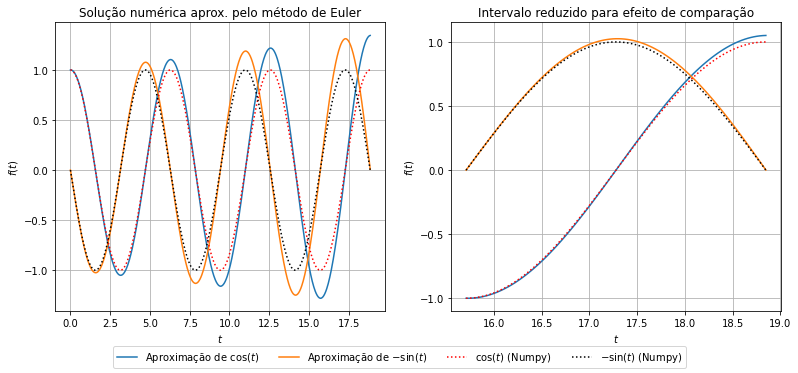

In [186]:
ts, vs = euler(F2, 0, 6*np.pi, np.array([1.0,0.0]), nsteps=600)
ts2, vs2 = euler(F2, 5*np.pi, 6*np.pi, np.array([-1.0,0.0]), nsteps=100)
vs = np.transpose(vs)
vs2 = np.transpose(vs2)


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5.5), gridspec_kw={'bottom': .15})

axs[0].plot(ts, vs[0])#, label="Aproximação de $\cos(t)$")
axs[0].plot(ts, vs[1])#, label="Aproximação de $-\sin(t)$")
axs[0].plot(ts, np.cos(ts), linestyle=":", color="r")#, label='$\cos(t)$ (Numpy)'
axs[0].plot(ts, -np.sin(ts), linestyle=":", color="k")# label='$-\sin(t)$ (Numpy)'


axs[0].set_title("Solução numérica aprox. pelo método de Euler")

axs[1].plot(ts2, vs2[0], label="Aproximação de $\cos(t)$")
axs[1].plot(ts2, vs2[1], label="Aproximação de $-\sin(t)$")
axs[1].plot(ts2, np.cos(ts2), label='$\cos(t)$ (Numpy)', linestyle=":", color="r")
axs[1].plot(ts2, -np.sin(ts2), label='$-\sin(t)$ (Numpy)', linestyle=":", color="k")

axs[1].set_title("Intervalo reduzido para efeito de comparação")
# axs[1].legend()

for i in range(2):
  axs[i].set_xlabel("$t$")
  axs[i].set_ylabel("$f(t)$")
  axs[i].grid()

handles, labels = axs[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=len(handles))

plt.show();

O que aconteceu?

É possível observar que a solução numérica da EDO diverge mais da solução analítica à medida que $t$ aumenta. O plot auxiliar à direita (acima) mostra que não se trata de um problema associado aos valores específicos de $t$ envolvidos, pois, partindo-se de $t_0 = 5 \pi$, a solução, a princípio, parece tão precisa quanto em $t_0 = 0$ no caso anterior, e então vai se "descolando" da solução verdadeira com o aumento de $t$, de maneira análoga à observada anteriormente no intervalo $[0, \pi]$.

Cabe ressaltar que, nos três casos, o número de passos utilizado foi proporcional ao comprimento de cada intervalo, de forma que os "subintervalos" ao longo dos quais a função era aproximada por sua reta tangente em um extremo tinham sempre o mesmo comprimento.

Desse modo, concluímos que a origem do erro está no aumento do número de iterações realizadas pelo método de Euler. Cada iteração envolve uma aproximação de um valor de $y(t)$, que, por sua vez, é usada na iteração seguinte. Isso significa que os erros gerados pela aproximação a cada passo acumulam-se ao longo do processo, gerando uma aproximação progressivamente pior da solução.

### 6. Erros multidimensionais

Voltemos ao intervalo $[0, \pi]$.
Como se comporta o erro no caso do sistema acima, conforme o número de pontos aumenta?
Qual erro é mais importante: o da derivada ($f_2$) ou o da função original ($f_1$)?
Você vê uma razão para isso?

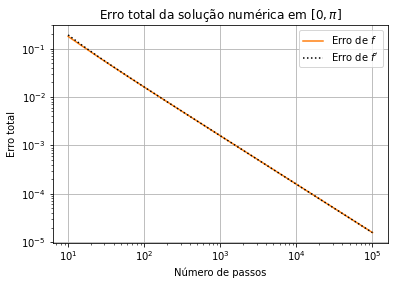

CPU times: user 2.01 s, sys: 14.5 ms, total: 2.02 s
Wall time: 2.03 s


In [187]:
%%time
ns = np.logspace(1,5,num=21, dtype=int)
err = [[],[]]

for n in ns:
  ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=n)
  vs = np.transpose(vs)

  err[0].append(erro(np.cos,vs[0],ts))
  err[1].append(erro(lambda x: -np.sin(x),vs[1],ts))

fig, ax = plt.subplots()

ax.loglog(ns, err[0], label = "Erro de $f$", color="C1")
ax.loglog(ns, err[1], label = "Erro de $f'$", linestyle=":", color="k")
ax.set_xlabel("Número de passos")
ax.set_ylabel("Erro total")

ax.legend()
ax.set_title("Erro total da solução numérica em $[0, \pi]$")
ax.grid()

ax = plt.gca()
plt.show()

In [188]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 2
assert len(ax.legend().texts) == 2

In [189]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 1e1
assert max(xdata) == 1e5

ydata = [l.get_ydata() for l in ax.lines]
assert 1e-5 < np.min(ydata) < 5e-5
assert 1e-1 < np.max(ydata) < 5e-1

Comente abaixo

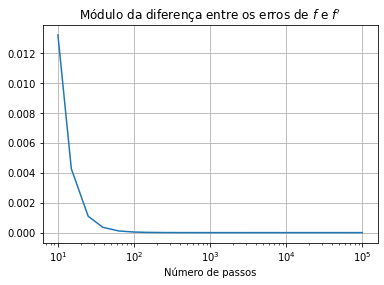

In [190]:
diff_dos_erros = []
for pos, er in enumerate(err[1]):
    diff_dos_erros.append(abs(er - err[0][pos]))

plt.semilogx(ns,diff_dos_erros)
plt.grid()
plt.xlabel("Número de passos")
plt.title("Módulo da diferença entre os erros de $f$ e $f'$");

Analisando o gráfico **'Erro total da solução numérica'**, percebemos que o erro da $f'$ e da $f$ são bem próximos no intervalo $[0,\pi]$, sendo só um pouco diferentes no início como mostrado no gráfico acima quando o número de passos é pequeno e o erro na escala loglog decai linearmente com o número de passos.  


O erro certamente depende do intervalo "de integração" da equação diferencial.
Será que a importância relativa também depende? Faça o gráfico do erro para o intervalo $[0, \pi/2]$ e conclua.

CPU times: user 1.2 s, sys: 2.8 ms, total: 1.2 s
Wall time: 1.2 s


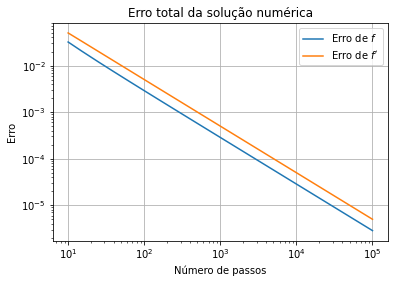

In [191]:
%%time
ns = np.logspace(1,5,num=21, dtype=int)
err = [[],[]]
for n in ns:
  ts, vs = euler(F2, 0, np.pi/2, np.array([1.0,0.0]), nsteps=n)
  vs = np.transpose(vs)

  err[0].append(erro(np.cos,vs[0],ts))
  err[1].append(erro(lambda x: -np.sin(x),vs[1],ts))
fig, ax = plt.subplots()

ax.loglog(ns, err[0], label = "Erro de $f$" )
ax.loglog(ns, err[1], label = "Erro de $f'$" )
ax.set_xlabel("Número de passos")
ax.set_ylabel("Erro")

ax.legend();
ax.set_title("Erro total da solução numérica")
ax.grid()

Comente

A seguir, exceto nos gráficos em que o número de passos aparece na abscissa, nos quais a grid está em cinza, linhas cinzas são múltiplos de $\frac{\pi}{2}$ e pontilhados cinzas são os demais múltiplos de $\frac{\pi}{6}$.

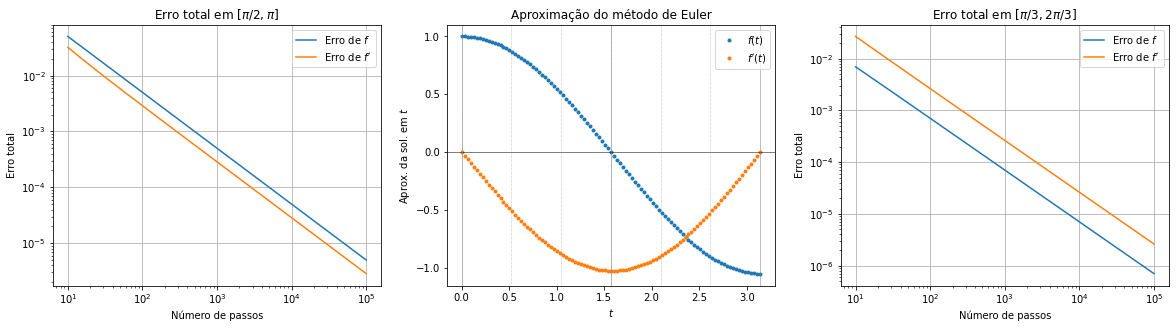

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8))

# Erro total em intervalos diferentes, em função
# de nsteps:

ns = np.logspace(1,5,num=21, dtype=int)

err = [[[],[]], [[],[]]]

pts = [[np.pi / 2, np.pi], [np.pi / 3, 2 * np.pi / 3]]

for n in ns:
    for i in range(2):
        a, b = pts[i][0], pts[i][1]
        ts, vs = euler(F2, a, b, np.array([np.cos(a), 
                        -np.sin(a)]), nsteps=n)
        vs = np.transpose(vs)

        err[i][0].append(erro(np.cos, vs[0], ts))
        err[i][1].append(erro(lambda x: -np.sin(x), vs[1], ts))
        
for i in range(2):
    axs[2*i].loglog(ns, err[i][0], label = "Erro de $f$")
    axs[2*i].loglog(ns, err[i][1], label = "Erro de $f'$")
    axs[2*i].set_xlabel("Número de passos")
    axs[2*i].set_ylabel("Erro total")
    axs[2*i].grid()

axs[0].set_title("Erro total em $[\pi/2, \pi]$")
axs[2].set_title("Erro total em $[\pi/3, 2\pi/3]$")


# Aproximação da solução plotada com markers:

ts, ys = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)

ys = np.transpose(ys)

axs[1].plot(ts, ys[0], linestyle="", marker=".", label="$f(t)$")
axs[1].plot(ts, ys[1], linestyle="", marker=".", label="$f'(t)$")
axs[1].set_title("Aproximação do método de Euler")


axs[1].axhline(color="k", linewidth=.5)

for k in range(3):
    axs[k].legend()
    axs[1].axvline(x=(k/2)*np.pi, color="gray", linewidth=.5)

for k in range(6):
    axs[1].axvline(x=(k/6)*np.pi, color="gray", linestyle=":", linewidth=.5)

axs[1].set_xlabel("$t$")
axs[1].set_ylabel("Aprox. da sol. em $t$");

Plotar a solução aproximada fornecida pelo método de Euler com marcadores em vez de uma curva contínua permite observar mais claramente onde a variação no valor de $y$ entre pontos adjacentes é maior, o que corresponde a maiores valores absolutos da derivada de cada função. Como as aproximações são feitas para valores de $t$ igualmente espaçados, de modo a manter uma distância horizontal constante entre pontos consecutivos, uma maior proximidade dos marcadores no gráfico indica uma variação de $y$ menor. (É claro que a inclinação da reta tangente pode ser mentalmente estimada através do próprio gráfico, mas quando há "buracos" isso se torna bastante evidente, facilitando a análise visual.)

Experimentando intervalos diversos, casos simples como o de $\left[\frac{\pi}{3}, \frac{2\pi}{3}\right]$, mostrado acima como exemplo, sugeriram que, quando a derivada de uma das duas funções assume, em média, valores absolutos menores num intervalo, o erro na aproximação dela é maior; caso de $f'(t) = -\sin(t)$ no exemplo.

Casos como $\left[0, \frac{\pi}{2}\right]$, $\left[\frac{\pi}{2}, \pi\right]$ e $\left[0, \pi\right]$ são mais sutis, porque os valores absolutos médios assumidos são iguais. (Todos esses três casos têm gráficos feitos acima.)

Em $\left[0, \frac{\pi}{2}\right]$, o valor absoluto da derivada de $f_2$ termina num mínimo, e o de $f_1'$, num máximo; o maior erro total é de $f_2$. Em $\left[\frac{\pi}{2}, \pi\right]$, temos o contrário, como maior erro total de $f_1$. No intervalo $\left[0, \pi\right]$, temos novamente o valor absoluto de $f_1'$ terminando num mínimo, mas o erro apresentado pelas duas funções foi igual, o que pode ter relação com o fato de as funções não serem monótonas no intervalo (comportamento mais simétrico?).

*(Continua abaixo dos gráficos a seguir)*

In [132]:
ts, vs = euler(F2, 0, np.pi, np.array([1.0,0.0]), nsteps=100)
ts2, vs2 = euler(F2, 0, 6*np.pi, np.array([1.0,0.0]), nsteps=600)
vs = np.transpose(vs)
vs2 = np.transpose(vs2)

T = [ts, ts2]
V = [vs, vs2]

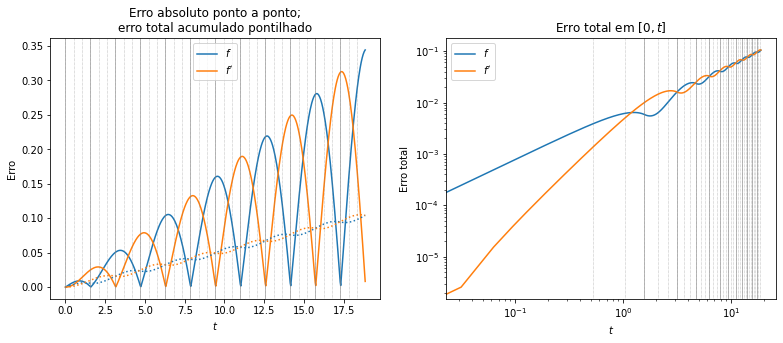

In [133]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 4.8))

axs[0].plot(T[1], np.abs(np.cos(T[1]) - V[1][0]), 
               label="$f$")
axs[0].plot(T[1], np.abs(-np.sin(T[1]) - V[1][1]),
               label="$f'$")
axs[0].set_ylabel("Erro")

avgs = [np.zeros(T[1].shape), np.zeros(T[1].shape)]

for i, t in enumerate(T[1]):
    avgs[0][i] = np.average(np.abs(np.cos(T[1]) - V[1][0])[:i+1])
    avgs[1][i] = np.average(np.abs(-np.sin(T[1]) - V[1][1])[:i+1])
    
axs[0].plot(T[1], avgs[0], color="C0", linestyle=":")
axs[0].plot(T[1], avgs[1], color="C1", linestyle=":")

axs[0].set_title("Erro absoluto ponto a ponto;\nerro total acumulado pontilhado");

axs[1].loglog(T[1], avgs[0], label="$f$")
axs[1].loglog(T[1], avgs[1], label="$f'$")

axs[1].set_ylabel("Erro total")
axs[1].set_title("Erro total em $[0, t]$");

for i in range(2):
    axs[i].legend()
    axs[i].set_xlabel("$t$")
    for k in range(12):
        axs[i].axvline(x=(k/2)*np.pi, color="gray", linewidth=.5)

    for k in range(36):
        axs[i].axvline(x=(k/6)*np.pi, color="gray", linestyle=":", linewidth=.5)

No gráfico acima, à esquerda, vemos que, exceto para valores de $t$ muito pequenos, os máximos do erro absoluto de $f_1$ e mínimos do de $f_2$ ocorrem em múltiplos pares de $\frac{\pi}{2}$, e vice-versa para os múltiplos ímpares. Os pontos de máximo correspondem, para cada função $g$, aos máximos de $|g| = |g''|$ e mínimos de $|g'|$.

Soma-se a isso a observação, nos gráficos que contrastam as funções do Numpy com as aproximações do método de Euler, de que uma aproximação parece "descolar-se" mais da solução "exata" nos pontos onde seu gráfico é mais curvo.

Essas observações sugeriram uma relação entre o erro da aproximação e a curvatura dos gráficos de $f_1$ e $f_2$. <a href=https://tutorial.math.lamar.edu/Classes/CalcIII/Curvature.aspx>A curvatura do gráfico de uma função</a>  $g$ é dada por, em cada ponto $t$:

$$\kappa (t) = \frac{\left| g''(t) \right|}{ \left[ 1 + \left( g'(t) \right)^2 \right]^\frac{3}{2} } $$

Como estamos tratando de funções trigonométricas, vale ainda que:

$$\kappa (t) = \frac{ \sqrt{1 - \left( g'(t) \right)^2} }{ \left[ 1 + \left( g'(t) \right)^2 \right]^\frac{3}{2} } $$

Sendo, neste caso, $0 \leq \left( g'(t) \right)^2 \leq 1$, temos $0 \leq \kappa (t) \leq 1$, com máximos onde $g'(t) = 0$, o que corresponde aos mínimos de $|g'(t)|$.

Uma vez que, no método de Euler, a função é aproximada, em cada subintervalo, pela reta tangente ao seu gráfico, parece razoável que, de fato, essa aproximação seja tanto pior em cada ponto quanto mais a função se afastar localmente de sua reta tangente, i.e., quanto maior sua curvatura $\kappa (t)$.

Já havia sido observado num item anterior que, independentemente da curvatura, o erro aumenta progressivamente à medida que o número de iterações realizadas pelo método de Euler aumenta. Sendo assim, é possível que um fator envolvido na predominância dos erros de $f_1$ e $f_2$ em $\left[\frac{\pi}{2}, \pi\right]$  e $\left[0, \frac{\pi}{2}\right]$, respectivamente, seja o fato de o gráfico de cada uma das funções ter assumido suas curvaturas máxima e mínima uma única vez em cada intervalo, mas, em cada um deles, a de maior erro ter atingido esse máximo *por último*. O efeito combinado do erro devido à curvatura e ao índice da iteração simultaneamente máximos pode ter gerado a predominância do erro total da função em questão. Essa ideia também é reforçada pelo gráfico comparativo entre as soluções "exatas" e aproximadas.

Não testamos exaustivamente as variações possíveis desse tipo de intervalo, mas o comportamento se manteve com pequenos deslocamentos que preservavam o comprimento.

No intervalo $\left[0, \pi\right]$, a não bijetividade de $f_1$ e $f_2$ parece ter gerado um efeito de compensação: $f_1$ tem dois máximos de curvatura, um na iteração inicial e outro na final, ao passo que $f_2$ atinge um único máximo de curvatura, na posição média entre os de $f_1$.

Ainda que não se tratem de argumentos totalmente conclusivos ou explicativos, acreditamos que sejam esses os fatores envolvidos na predominância ou não do erro de $f_1$ ou $f_2$ em diferentes intervalos.

## Parte 2: Métodos de maior ordem para EDOs

### Equações diferenciais e Integrais

Calcular a integral $\int_a^b h(t) \, dt$ é a mesma coisa que resolver a equação diferencial
$$ \begin{cases}
  y'(t) & = h(t) \\
  f(a)  & = 0,
\end{cases} $$
pelo Teorema Fundamental do Cálculo.
Portanto, é possível implementar uma função `int_rect` usando a função `euler`.

Isso é verdade para vários métodos de integração: muitas vezes existe um método de Equações Diferenciais cujo caso particular é um método de integração quando a ED é "trivial"
(ou seja, quando a fórmula $F$ para $y'(t)$ não depende de $y(t)$).

### O método do Trapézio para EDOs: uma equação implícita

Inversamente, podemos usar métodos de integração e "generalizar" para usar em EDOs.
Por exemplo, podemos usar a aproximação do trapézio:
$$ y(h) = y(0) +  \int_0^h y'(t) \, dt \sim h \cdot \frac{y'(0) + y'(h)}{2}.$$

Substituindo a EDO $f'(t) = F(t, f(t))$, isto dá uma equação **implícita** para calcular $y(h)$.

### Trapézio 1: Equação implícita

Escreva a equação implícita que a aproximação $y_1$ de $y(h)$ satisfaz, em função de $y_0$, $h$, $F$, $\ldots$.

A aproximação para $y(h)$ dada acima é a fórmula para integração pelo método do trapézio, de forma que tivemos a impressão de que a expressão levava em conta a condição $f(a) = y(0) = 0$ dada acima.

No caso mais geral em que não se está partindo de $t_0 = 0$, teremos:

$$ y (t_{i+1}) =  y (t_i) + \int_{t_i}^{t_{i+1}} y'(t) \, dt \approx y (t_i) + h \cdot \frac{y'(t_{i+1}) + y'(t_i)}{2} = $$
$$ = y (t_i) + h \cdot \frac{F(t_{i+1}, y (t_{i+1})) + F(t_{i}, y (t_i))}{2}$$


### Trapézio 2: resolvendo a equação implícita de 1 passo

Escreva uma função que dá o passo do método do trapézio.

Obs: O método da secante precisa de dois pontos para iniciar.
Que valor de $y$ deve estar próximo à solução?
Se você tiver que "chutar" outro valor, este provavelmente estará mais próximo ou mais distante?
Qual deles você deve usar como primeiro e qual como segundo valor na secante?

In [134]:
def secante(f,a,b, xtol=1e-8, maxiter=100):
    """ Método da secante para a função  f  no intervalo  [a,b].

        Retorna um número  z  e as listas de extremidades esquerda e direita produzidas ao longo do algoritmo,
        que pára quando o último passo é menor do que  xtol, ou depois de  maxiter  iterações.
    """
    fa = f(a)
    fb = f(b)
    
    def passo(a, b, fa, fb):
        beta = (a*fb - fa*b)/(fb - fa)
        return beta
    
    # Estrutura recursiva básica
    def dividir(a,b,fa,fb, niters):
        
        s = passo(a, b, fa, fb)
        if (
            niters == maxiter or
            abs(a - b) < xtol or
            abs(b - s) < xtol
        ):
            return s, [a], [b]

        fs = f(s)
        if fs == 0:
            return s, [a], [b]

        z,l,r = dividir(b, s, fb, fs, niters + 1)
        return z, [a] + l, [b] + r
    
    z,l,r = dividir(a,b,fa,fb, 0)
    return z, np.array(l), np.array(r)

In [135]:
def trapezoidal_step_sec(F, tcurr, ycurr, h):
    """Resolve a equação implícita do método trapezoidal pelo método da secante, partindo de (tcurr,ycurr),
    retornando uma aproximação de  y  em  tcurr+h."""
    tnext = tcurr+h
    def f(y):
      return h*(F(tcurr,ycurr)+ F(tnext,y))/2  + ycurr - y
    
    if F(tcurr,ycurr):
      y2 = ycurr + h*F(tcurr, ycurr)
    else:
      y2 = ycurr + h
    y,_,_ = secante(f, ycurr, y2, xtol=1e-9, maxiter=100)
    return y

### Alguns testes simples

In [136]:
def G(t,y):
    return t - np.cos(y)

ynext = trapezoidal_step_sec(G, 0, 1, 0.1)
assert abs(ynext - 0.9488541465905801) < 1e-14

In [137]:
ynext = trapezoidal_step_sec(G, 0, 1, 0.3)
assert abs(ynext - 0.8668725901552984) < 1e-14

### Trapézio 3: Resolvendo a EDO

Agora, incorporamos o passo do trapézio numa função `trapezoidal_ode`, análoga à `euler`,
que resolve a EDO $y' = F(t, y(t))$ pelo método do trapézio.

In [138]:
def trapezoidal_ode(F, t0, tf, y0, nsteps=100):
    """Calcula uma solução aproximada da equação  y' = F(t,y)  pelo método do trapézio,
    dividindo o intervalo  [t0, tf]  em  nsteps  passos,
    e usando o método da secante para resolver a equação implícita."""
    ts, h = np.linspace(t0,tf,num=nsteps + 1,retstep=True)
    ys = np.zeros(ts.shape)
    ys[0] = y0
    for i, tcurr in enumerate(ts[:-1]):
      ys[i + 1] = trapezoidal_step_sec(F, tcurr, ys[i], h)
    return ts, np.array(ys) 

In [139]:
def F1(t,y):
    return y

t_100, y_100 = trapezoidal_ode(F1, 0, 1, 1)
assert len(t_100) == 101
assert t_100[0] == 0
assert t_100[-1] == 1

In [140]:
t_100, y_100 = trapezoidal_ode(F1, 0, 1, 1)
assert len(y_100) == 101
assert y_100[0] == 1
assert( abs(y_100[-1] - 2.7183044812417965) < 5e-15 )

In [141]:
def F_dificil(t, y):
    return t*np.sin(y) - t**2*np.cos(y)

_, y_dificil = trapezoidal_ode(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(y_dificil[-1] - 3.587544094834753) < 5e-15 )

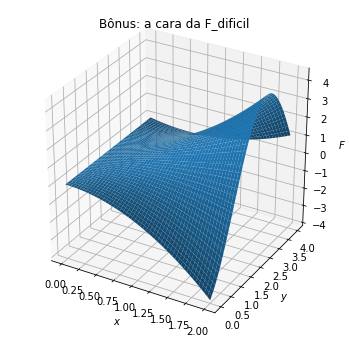

In [142]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

uttt = np.linspace(0, 2, num=1000)
yyys = np.linspace(0, 4, num=1000)

U, Y = np.meshgrid(uttt, yyys)

Z = F_dificil(U, Y)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$F$')

ax.set_title("Bônus: a cara da F_dificil")

ax.plot_surface(U, Y, Z);

Tivemos curiosidade de plotar a função. No Colab as quinas da figura ficaram meio cortadas e não conseguimos arrumar, no Jupyter e no Python regular não; talvez apareçam um pouco cortadas por aí.

In [143]:
t_100, y_100 = trapezoidal_ode(F1, 0, 1, 1)
assert np.allclose(y_100, np.exp(t_100))
assert 1e-5 < np.max(y_100 - np.exp(t_100)) < 5e-5

t_1000, y_1000 = trapezoidal_ode(F1, 0, 1, 1, nsteps=1000)
assert np.allclose(y_1000, np.exp(t_1000), rtol=1e-7)
assert 1e-7 < np.max(y_1000 - np.exp(t_1000)) < 5e-7

O que a caixa acima está testando?

A equação diferencial $f' = f$ com condição incial $f(0) = 1$ tem como solução $f(t) = e^t$. Por isso, o primeiro e o terceiro asserts verificam se os valores de $y$ retornados de fato estão "suficientemente" próximos de $e^t$ para $t$ correspondente. O critério de "proximidade suficiente" é mais rígido (menor tolerância) com um maior número de passos (terceiro assert). Da documentação do Numpy, a verificação feita por `np.allclose(a, b)` é (elemento a elemento)

`absolute(a - b) <= (atol + rtol * absolute(b))`,

onde os valores padrão dos parâmetros opcionais são `atol = 1e-8` e `rtol = 1e-5`. Ou seja: para cada $y$, é testado se

$$ \left| y - e^t \right| \leq \texttt{atol} + \texttt{rtol} \left| e^t \right| $$

Além dessa verificação, o segundo e quarto asserts também verificam se a *maior* dessas diferenças $y - e^t$ está dentro de um intervalo fornecido, que novamente envolve valores menores no caso com número de passos maior. Algumas observações curiosas são que: nesse caso, não é usado o valor absoluto, ou seja, é explicitamente exigido que $y > e^t$; além disso, também é fornecido um limite inferior para esse erro, de modo que a solução não poderia ser precisa "demais".

Posto que, para $t \in [0, 1]$, $e^t \leq e < 2,72$, logo $\texttt{rtol} \cdot e^t + \texttt{atol} < 2,72 \cdot \texttt{rtol} + 10^{-8} < 5 \cdot \texttt{rtol}$, em tese, os asserts com `np.allclose` já assegurariam a validade da cota superior em cada caso, mas não a positividade de $y - e^t$, nem a cota inferior.

### O método do ponto médio para integrais

Esse é um método de "duplo cálculo", e explícito:

- Andamos metade do tempo $h$, usando um passo "de Euler"
- Recalculamos o passo de Euler, mas usamos a derivada "no meio do caminho",
  que é uma aproximação melhor (porque simétrica).

Em fórmulas:
- Passo explícito, $m_i = y_i + F(t_i, y_i) \cdot h/2$
- 2º passo explícito: $y_{i+1} = y_i + F(t_i + h/2, m_i) \cdot h$

### Ponto médio 1:

Escreva uma função que dá o novo ponto usando a regra do ponto médio

In [144]:
def midpoint_step(F, t, y, h):
  """ Recebe como parametros F(t,y), t, y e h, e retorna y + F(t+h/2,m)*h , m = y + h*F(t,y)/2 """
  m = y + F(t,y)*h/2
  return y+ F(t+h/2, m)*h 

In [145]:
def G(t,y):
    return t - np.cos(y)

ynext = midpoint_step(G, 0, 1, 0.1)
assert abs(ynext - 0.9487165172210511) < 1e-14

In [146]:
ynext = midpoint_step(G, 0, 1, 0.3)
assert abs(ynext - 0.8630045486909678) < 1e-14

### Ponto médio 2: EDO

E agora, incorpore este passo num método de resolução de EDOs

In [147]:
def midpoint_ode(F, t0, tf, y0, nsteps=100):
    """Calcula uma solução aproximada da equação y' = F(t,y) no intervalo  [t0, tf]  usando  nsteps  passos,
    usando o passo explícito no ponto médio."""
    ts, h = np.linspace(t0, tf, num=nsteps+1, retstep=True)
    ys = [y0]
    for t in ts[:-1]:
      yt = ys[-1]
      ys.append(midpoint_step(F,t,yt,h))

    return ts, np.array(ys)

In [148]:
def F1(t,y):
    return y

t_100, y_100 = midpoint_ode(F1, 0, 1, 1)
assert len(t_100) == 101
assert t_100[0] == 0
assert t_100[-1] == 1

In [149]:
t_100, y_100 = midpoint_ode(F1, 0, 1, 1)
assert len(y_100) == 101
assert y_100[0] == 1
assert( abs(y_100[-1] - 2.718236862559957) < 5e-15 )

In [150]:
def F_dificil(t, y):
    return t*np.sin(y) - t**2*np.cos(y)

_, y_dificil = midpoint_ode(F_dificil, 0, 2, 1, nsteps=100)
assert( abs(y_dificil[-1] - 3.5874427140529868) < 5e-15 )

In [151]:
t_100, y_100 = midpoint_ode(F1, 0, 1, 1)
assert np.allclose(y_100, np.exp(t_100), rtol=2e-5)
assert 2e-5 < np.max(abs(y_100 - np.exp(t_100))) < 10e-5

t_1000, y_1000 = midpoint_ode(F1, 0, 1, 1, nsteps=1000)
assert np.allclose(y_1000, np.exp(t_1000), rtol=2e-7)
assert 2e-7 < np.max(abs(y_1000 - np.exp(t_1000))) < 10e-7

### Gráficos

### Gráficos 1: Solução de EDOs

Resolva a EDO

$$y' = t - \cos(y)$$

com condição inicial $y(0) = 1$ no intervalo $[0,5]$, usando 30 pontos,
pelos 3 métodos (Euler, Trapézio, ponto médio).
Faça o gráfico das três soluções.
Não esqueça do título e da legenda!

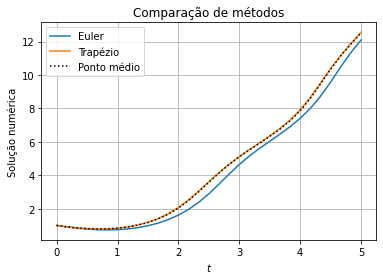

In [152]:
def F_g1(t,y):
  return t-np.cos(y)

t0,tf,y0, n = 0,5,1,30
ts,y_e = euler(F_g1,t0,tf,y0,nsteps=n)
_,y_t = trapezoidal_ode(F_g1,t0,tf,y0,nsteps=n)
_,y_m = midpoint_ode(F_g1,t0,tf,y0,nsteps=n)

fig, ax = plt.subplots()

ax.plot(ts,y_e, label = "Euler" )
ax.plot(ts,y_t,label = "Trapézio" )
ax.plot(ts,y_m,label = "Ponto médio", linestyle= ":", color = "k"  )

ax.set_xlabel("$t$")
ax.set_ylabel("Solução numérica")

ax.legend();
ax.set_title("Comparação de métodos")
ax.grid()

ax = plt.gca()
plt.show()

In [153]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [154]:
ax = None

Esta EDO não tem "solução analítica simples".
Como você faria para saber qual das curvas está "mais correta"?
Explique sua ideia abaixo, e faça contas / gráficos na caixa seguinte

Uma primeira observação é que as soluções dos métodos do trapézio e do ponto médio quase coincidiram — ainda que o método do ponto médio tenha sido adaptado do método de Euler, o que poderia gerar a expectativa de que fossem mais parecidos —, de modo que, de início, julgamos provável que essas soluções estivessem mais próximas da solução verdadeira.

A única informação "analítica" que temos sobre a função é sua derivada, de modo que uma ideia que pareceu plausível foi usar a derivação numérica da semana 4 para derivar a "caixa preta" retornada pelos três métodos e comparar com a derivada $y' = t - \cos(y)$. No entanto, mesmo essa expressão para $y'$ é dependente de $y$, de modo que sua utilidade é limitada por requerir o uso da própria solução numérica.

A aproximação numérica feita para a derivada a partir da solução obtida foi, para o array `y[1:-1]`:

$$ y'(t_i, y_i) \approx \frac{\texttt{y[i+1]} - \texttt{y[i-1]}}{2h} = \frac{\texttt{y[i+1]} - \texttt{y[i-1]}}{\texttt{ts[i+1]} - \texttt{ts[i-1]}}$$

Para reduzir o número de operações, foi usado o valor de $h$ retornado pela função `linspace` do Numpy, em lugar de calcular `ts[i+1] - ts[i-1]` a cada vez.

Em cada caso, para cálculo do erro, foi substituída na expressão dada para $y'$ a aproximação de $y$ produzida pelo método correspondente.

O erro de aproximação introduzido pela derivada central é conhecido (vide lema), mas envolve a terceira derivada de $y$, cujo cálculo incorporaria novamente os valores aproximados de $y$ e uma boa quantidade de operações. Desse modo, para evitar introduzir ruído que distorceria a comparação, foi considerado o resultado "não corrigido" da derivação numérica, sob a hipótese de que o erro introduzido por esse processo deveria ser similar para todos os métodos.

**Lema.** Seja $f: [a, b] \to \mathbb{R}$ com terceira derivada definida em $(a, b)$. O erro de aproximação introduzido pela derivação numérica com o método da derivada central é

$$ \frac{1}{3!}f'''(x)h^2 + \mathcal{O}(h^3). $$

\
*Dem.:* A fórmula para aproximação da derivada central de uma função é

$$ f' \approx \frac{f(x+h) - f(x-h)}{2h}, $$

para algum $h \neq 0$.

Para uma função com terceira derivada definida, podemos aproximar:

$$
\begin{aligned}
\frac{f(x+h) - f(x-h)}{2h} = \: & \frac{1}{2h} \left[ f(x) + f'(x)h + \frac{1}{2} f''(x)h^2 + \frac{1}{3!}f'''(x)h^3 + \mathcal{O}(h^4) \right. \\
& \left. - \left( f(x) - f'(x)h + \frac{1}{2} f''(x)h^2 - \frac{1}{3!}f'''(x)h^3 + \mathcal{O}(h^4)\right)\right] = \\
=& \: f'(x) + \frac{1}{3!}f'''(x)h^2 + \mathcal{O}(h^3)
\end{aligned}
$$

Assim,

$$ f'(x) - \frac{f(x+h) - f(x-h)}{2h} = \frac{1}{3!}f'''(x)h^2 + \mathcal{O}(h^3). $$

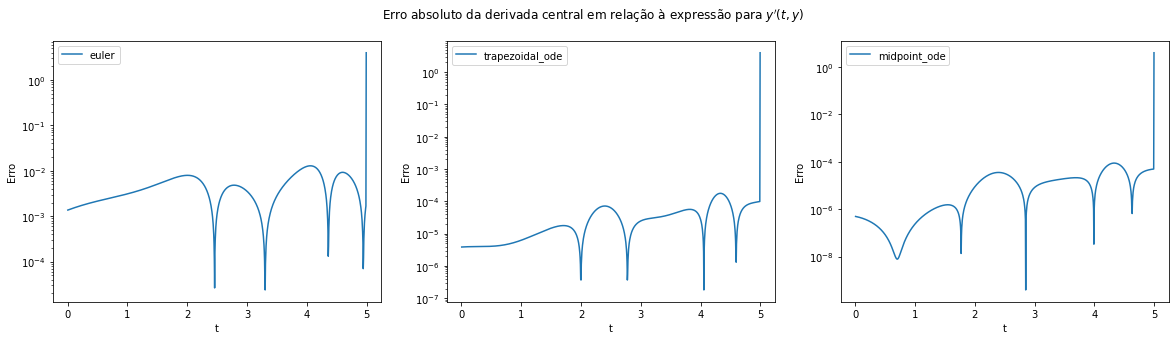

In [155]:
a, b, y0, n = 0, 5, 1, 1000

def F_g1(t,y):
  return t-np.cos(y)

ts, h = np.linspace(t0, tf, num=n+1, retstep=True)

h = 2 * h  # para a derivada central

methods_3 = [euler, trapezoidal_ode, midpoint_ode]
names = [f.__name__ for f in methods_3]

ys = {f.__name__: f(F_g1, a, b, y0, nsteps=n)[1] for f in methods_3}
dys = {name: np.zeros(ys[name].shape) for name in names}

for name in names:
    for i, y in enumerate(ys[name][1:-1]):
        dys[name][i] = (ys[name][i+1] - ys[name][i-1]) / h
        # derivada central

errs = {name: np.abs(F_g1(ts, ys[name])[1:-1] - \
                    dys[name][1:-1]) for name in names}

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8))

for i, name in enumerate(names):
    axs[i].semilogy(ts[1:-1], errs[name], label=name)
    axs[i].legend()
    axs[i].set_xlabel("t")
    axs[i].set_ylabel("Erro")

fig.suptitle("Erro absoluto da derivada central em relação à expressão para $y'(t, y)$");

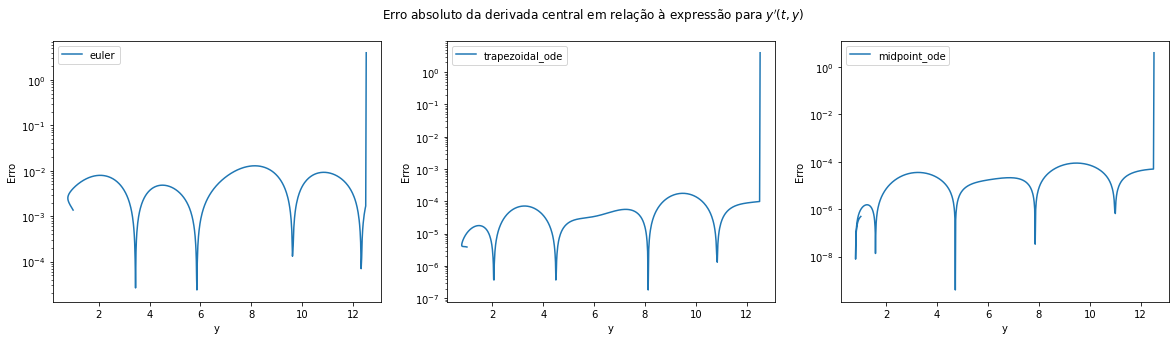

In [156]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 4.8))

for i, name in enumerate(names):
    axs[i].semilogy(ys[name][1:-1], errs[name], label=name)
    axs[i].legend()
    axs[i].set_xlabel("y")
    axs[i].set_ylabel("Erro")

fig.suptitle("Erro absoluto da derivada central em relação à expressão para $y'(t, y)$");

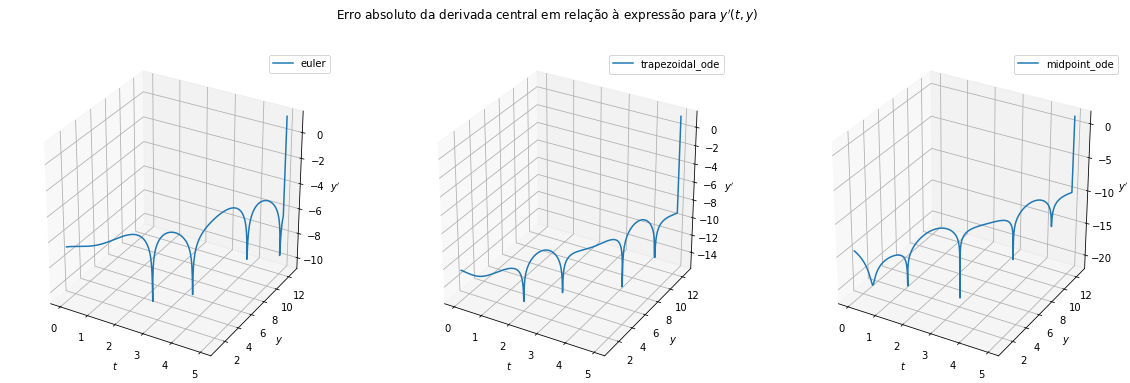

In [157]:
fig = plt.figure(figsize = (20, 6))

for i, name in enumerate(names):
    nplot = 131 + i
    ax = fig.add_subplot(nplot, projection='3d')
    ax.plot(ts[1:-1], ys[name][1:-1], np.log(errs[name]), label=name)
    # Parece que a escala logarítimica não funciona muito 
    # bem para gráficos 3D no Matplotlib, então o log foi
    # calculado
    ax.legend()
    ax.set_xlabel('$t$')
    ax.set_ylabel('$y$')
    ax.set_zlabel("$y'$")

fig.suptitle("Erro absoluto da derivada central em relação à expressão para $y'(t, y)$");

In [158]:
print("Erro total:\n")

for name in names:
    errtot = np.average(errs[name])
    print(f"{name:>15}: {errtot}")
    
print("\nErro total (excluindo o último ponto):\n")

for name in names:
    errtot = np.average(errs[name][:-1])
    print(f"{name:>15}: {errtot}")

Erro total:

          euler: 0.008657115038128844
trapezoidal_ode: 0.004035016112636929
   midpoint_ode: 0.004016039140643551

Erro total (excluindo o último ponto):

          euler: 0.004661407861298137
trapezoidal_ode: 3.528519084788828e-05
   midpoint_ode: 1.6287622094803458e-05


Portanto, parece que o método do ponto médio retornou um erro total marginalmente menor, próximo daquele retornado pelo método do trapézio. Além disso, de forma condizente com nossa observação inicial a partir do gráfico pedido, o método de Euler parece bastante menos preciso do que os demais.

O cálculo sem o último valor de $y'$ foi incluído pois os gráficos sugerem a ocorrência de algo anômalo nesse ponto. As funções de cálculo do erro total e da derivada central (da semana 4) não foram usadas diretamente por conta do formato particular dos resultados.

### Gráficos 2: Velocidade de convergência

In [159]:
methods_3 = [euler, trapezoidal_ode, midpoint_ode]

Faça uma função que desenha o gráfico dos erros de solução de uma EDO, dados
- a função $F$ da EDO
- o intervalo $[a,b]$
- a condição inicial $y_0$
- a solução analítica `ysol`
- o número de pontos $n$


In [160]:
def graph_err(F, a,b, y0, ysol, n, methods=methods_3):
  """
  Plota as curvas dos erros de solução de uma EDO do método do Trapézio, de Euler
  e do Ponto médio. Como parâmetros ela recebe a função F da EDO, um intervalo
  [a,b], a condição inicial y0, a solução analítica Ysol e o número de pontos
  que se deseja plotar.
  """
  ts = methods_3[0](F, a, b, y0, nsteps=n)[0]

  err = {f.__name__: f(F, a, b, y0, nsteps=n)[1] - ysol(ts) for f in methods_3}

  fig, ax = plt.subplots()

  for n, e in err.items():
    ax.plot(ts, e, label=n)

  ax.set_xlabel("$t$")
  ax.set_ylabel("Erro")

  ax.legend();
  ax.set_title("Comparação entre métodos")
  plt.legend(title="Método")

Uma EDO conhecida, para comparar o erro: $$y' = -y.$$

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: SymmetricalLogScale got an unexpected keyword argument 'linthresh'. In the future this will raise TypeError
  """


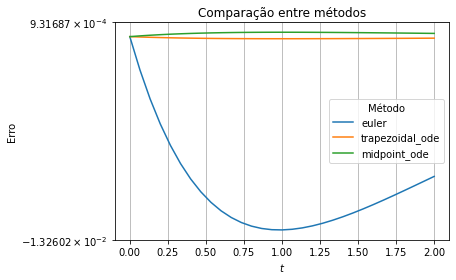

In [161]:
def G2(t,y): return -y
def ysol2(t): return np.exp(-t)

graph_err(G2, 0,2, 1, ysol2, 30)
plt.yscale('symlog', linthresh=1e-4) # Com "symlog", não use valores absolutos
plt.grid()
ax = plt.gca()

In [162]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

In [163]:
xdata = ax.lines[0].get_xdata()
assert min(xdata) == 0.0
assert max(xdata) == 2.0

ydata = [l.get_ydata() for l in ax.lines]
assert -2e-2 < np.min(ydata) < -1e-2
assert  1e-4 < np.max(ydata) <  4e-4

### Gráficos 3: Erro em função de $n$

Usando a função `erro` definida anteriormente, faça o gráfico do erro, para os 3 métodos,
em função de $n$, para a EDO $y' = y$, no intervalo $[0,2]$.

CPU times: user 3.48 s, sys: 1.03 ms, total: 3.48 s
Wall time: 3.49 s


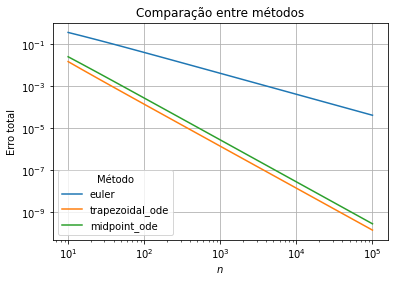

In [164]:
%%time
ns = np.logspace(1,5,num=21, dtype=int)

def G3(t,y): return y
def ysol3(t): return np.exp(t)

errs = {f.__name__: np.zeros(ns.shape) for f in methods_3}

a, b, y0 = 0, 2, 1

for i, n in enumerate(ns):
  ts = methods_3[0](G3, a, b, y0, nsteps=n)[0]
  err = {f.__name__: erro(ysol3, f(G3, a, b, y0, nsteps=n)[1], ts)
           for f in methods_3}
  for k, e in err.items():
    errs[k][i] = e

fig, ax = plt.subplots()

for f, es in errs.items():
  ax.loglog(ns, es, label=f)

ax.set_xlabel("$n$")
ax.set_ylabel("Erro total")

ax.grid()

ax.set_title("Comparação entre métodos")
ax.legend(title="Método");

In [165]:
assert ax.title.get_text() != ""
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3

O que você observa?

Que o método de **Euler** foi a "pior" aproximação dos três métodos implementados, pois é a função que menos convergiu e ainda teve o maior erro mesmo com a variação do **nsteps**, não só para a **EDO:** $y' = y$, mas também para outras funções como a $y' = -y$. Visualmente, na escala **loglog**, erro dos três métodos têm o comportamento próximo ao decaimento linear e as inclinações das "retas" **midpoint_ode** e da **trapezoidal_ode** são aproximadamente o dobro da reta de **Euler**, ou seja, o erro decai duas vezes mais rápido para esses métodos na comparação com **Euler**. Além disso, também é perceptível no gráfico que o comportamento dos erros **midpoint_ode** e da **trapezoidal_ode** são bem semelhantes, o que já foi notado no **Gráficos 2: Velocidade de convergência** e **Gráficos 1: Solução de EDOs**.